In [1]:
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import Perceptron


In [3]:
data_dir = "./../new_dataset/"
data = pd.read_csv(data_dir + "Cleaned-Data.csv")

In [4]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [5]:
label = data["Severity_Severe"]

In [6]:
data1 = data.drop(["Contact_Dont-Know", "Contact_No", "Contact_Yes", "Country", "Severity_Mild", "Severity_Moderate", "Severity_None", "Severity_Severe"], axis = 1)

In [7]:
data1.dropna(axis=0, inplace = True)

In [8]:
train_X, test_X, train_y, test_y = train_test_split(data1, label, test_size=0.35)

In [43]:
scaler = MinMaxScaler()

In [44]:
X = scaler.fit_transform(train_X)

In [47]:
testX = scaler.transform(test_X)

In [46]:
train_X.shape

(205920, 19)

# Support Vector Machine

In [48]:
svc = SVC()

In [49]:
svc.fit(X, train_y)

SVC()

In [50]:
pred = svc.predict(testX)

In [51]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     82988
           1       0.00      0.00      0.00     27892

    accuracy                           0.75    110880
   macro avg       0.37      0.50      0.43    110880
weighted avg       0.56      0.75      0.64    110880



C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

<AxesSubplot:>

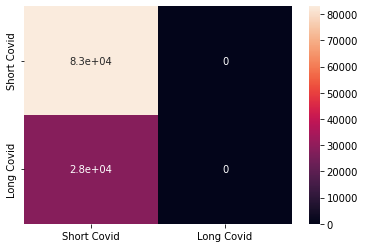

In [52]:
cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Logistic Regression

In [15]:
lr = LogisticRegression()

In [53]:
lr.fit(X, train_y)

LogisticRegression()

In [54]:
pred2 = lr.predict(testX)

C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
print(classification_report(test_y, pred2))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     82988
           1       0.00      0.00      0.00     27892

    accuracy                           0.75    110880
   macro avg       0.37      0.50      0.43    110880
weighted avg       0.56      0.75      0.64    110880



C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

<AxesSubplot:>

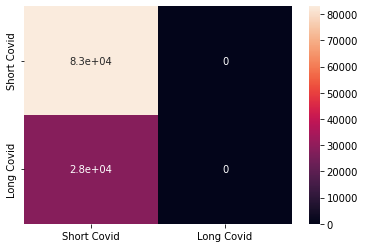

In [56]:
cm = confusion_matrix(test_y, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# KNN


In [57]:
knn = KNN(n_neighbors=5)

In [36]:
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=7)

In [37]:
pred3 = knn.predict(test_X)

C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
print(classification_report(test_y, pred3))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     82988
           1       0.23      0.06      0.10     27892

    accuracy                           0.71    110880
   macro avg       0.49      0.50      0.46    110880
weighted avg       0.62      0.71      0.65    110880



<AxesSubplot:>

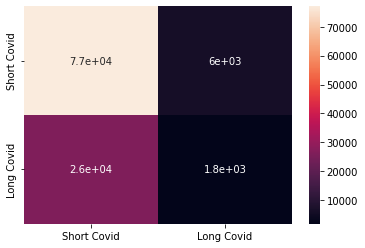

In [39]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Perceptron

In [29]:
perceptron = Perceptron(tol=1e-3, random_state=0)

In [30]:
perceptron.fit(train_X, train_y)

Perceptron()

In [31]:
perceptron.score(test_X, test_y)

0.5635371572871573

In [32]:
pred4 = perceptron.predict(test_X)

In [33]:
print(classification_report(test_y, pred4))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68     82988
           1       0.25      0.37      0.30     27892

    accuracy                           0.56    110880
   macro avg       0.50      0.50      0.49    110880
weighted avg       0.62      0.56      0.59    110880



<AxesSubplot:>

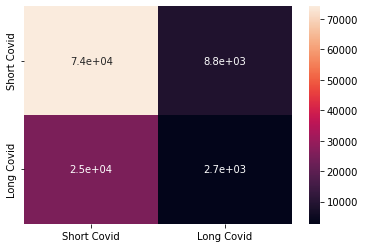

In [34]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])